<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Credit_Default_Risk_Analysis___its_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# For Panel Data Analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
# For Numerical Python
import numpy as np

# For Random seed values
from random import randint
# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for scientific computing
from scipy import stats
# for preprocessing and scaling
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,minmax_scale,StandardScaler
#feature selection
from sklearn.feature_selection import SelectFromModel
# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
# For Machine Learning Model Evaluation
from sklearn.metrics import classification_report
from yellowbrick.classifier import precision_recall_curve
from xgboost import to_graphviz,plot_importance
# To handle class imbalance problem
from imblearn.over_sampling import SMOTE
# To Disable Warnings
import warnings
warnings.filterwarnings(action="ignore")

In [0]:
LINK = 'https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv'

def load_default_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [24]:
data=load_default_data()
print(data.shape)
data.head()

(887379, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


In [25]:
len(data.describe().columns)

13

In [26]:
data.describe()

,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,7.502759e+04,14755.264605,13.246740,18.157039,7558.826684,5757.706424,45.919243,436.717127,0.075987
std,2.282734e+07,1.261741,4.555149e+04,3.507405,6.469815e+04,8435.455601,4.381867,17.190626,7871.243336,6625.441046,409.693874,244.186593,0.264977
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,0.000000e+00,500.000000,5.320000,0.000000,0.000000,0.000000,0.000000,15.670000,0.000000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,4.500000e+04,8000.000000,9.990000,11.910000,1914.590000,1200.570000,0.000000,260.705000,0.000000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,6.500000e+04,13000.000000,12.990000,17.650000,4894.999117,3215.320000,0.000000,382.550000,0.000000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,9.000000e+04,20000.000000,16.200000,23.950000,10616.814230,8000.000000,0.000000,572.600000,0.000000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,9.500000e+06,35000.000000,28.990000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000,1.000000


Observation:

50% of employees have 6 years of employment duration which is almost same for average employees as indicated by the mean and 50% values.

The average annual pay of the employee is  $ 75027.59 dollars and  $ 18.15 amount of consumer's monthly gross income goes towards paying debts.

The average loan amount required by the applicant is  $ 14755.26 dollars.

The average interst rate on average loan amount is 13.24%.

On average  $ 7558.82 dollars amount of money has been paid so far while  $ 409.69 dollars amount has yet to be retrieved.
75% of applicants have paid their debt as indicated by recoveries = 0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cust_id            887379 non-null  int64  
 1   year               887379 non-null  int64  
 2   state              887379 non-null  object 
 3   date_issued        887379 non-null  object 
 4   date_final         887379 non-null  int64  
 5   emp_duration       887379 non-null  float64
 6   own_type           887379 non-null  object 
 7   income_type        887379 non-null  object 
 8   app_type           887379 non-null  object 
 9   loan_purpose       887379 non-null  object 
 10  interest_payments  887379 non-null  object 
 11  grade              887379 non-null  object 
 12  annual_pay         887379 non-null  int64  
 13  loan_amount        887379 non-null  int64  
 14  interest_rate      887379 non-null  float64
 15  loan_duration      887379 non-null  object 
 16  dt

Observation:

It turns out that all features contains 887379 values.

date_issued and date_final are categorized as incorrect types.

**Numerical Data Distribution:
We shall plot all numerical features to analyze the distribution of their past.**

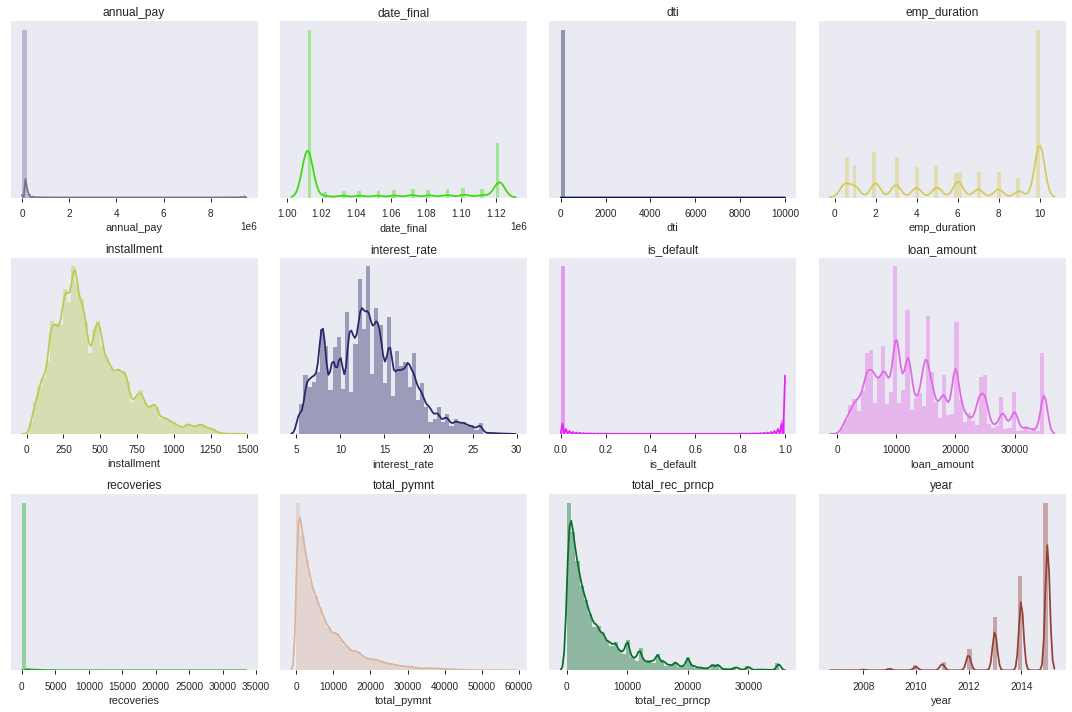

In [28]:
import matplotlib.pyplot as plt
from random import randint
fig, axes = plt.subplots(nrows = 3, ncols = 4, sharex = False, figsize=(15, 10))
colors = []
for i in range(12):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

  columns = ['annual_pay', 'date_final', 'dti', 'emp_duration', 'installment', 'interest_rate', 'is_default',
           'loan_amount', 'recoveries', 'total_pymnt', 'total_rec_prncp', 'year']
for ax, col, color in zip(axes.flat, columns, colors):
#for ax, col in zip(axes.flat, columns):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

Observation:

Postive Skewed Features: (Mean > Median)
annual_pay,
dti,
installment,
loan_amount,
recoveries,
totoal_pymnt,
total_rec_prncp

Negative Skewed Features: (Mean < Median)
year

~ Normally Distributed Features: (Mean = Median = Mode)
emp_duration,
interest_rate

**Categorical Data Distribution:
We shall plot all categorical features to analyze the distribution of the past data.

Firstly we will extract all the categorical features.
We remove date_issued because we won't be using time series to predict the classes and eventually will get removed at later stage.**

In [0]:
#extracting all cat variables
cat_list=[]
for i in data.columns.values:
  if data[i].dtype=="object":
    cat_list.append(i)


In [30]:
cat_list

['state',
 'date_issued',
 'own_type',
 'income_type',
 'app_type',
 'loan_purpose',
 'interest_payments',
 'grade',
 'loan_duration']

In [31]:
data.columns.values

array(['cust_id', 'year', 'state', 'date_issued', 'date_final',
       'emp_duration', 'own_type', 'income_type', 'app_type',
       'loan_purpose', 'interest_payments', 'grade', 'annual_pay',
       'loan_amount', 'interest_rate', 'loan_duration', 'dti',
       'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment',
       'is_default'], dtype=object)

In [32]:
cat_list.remove("date_issued")
print("cat_variables count:",len(cat_list))
print("cat variables are:",cat_list)

cat_variables count: 8
cat variables are: ['state', 'own_type', 'income_type', 'app_type', 'loan_purpose', 'interest_payments', 'grade', 'loan_duration']


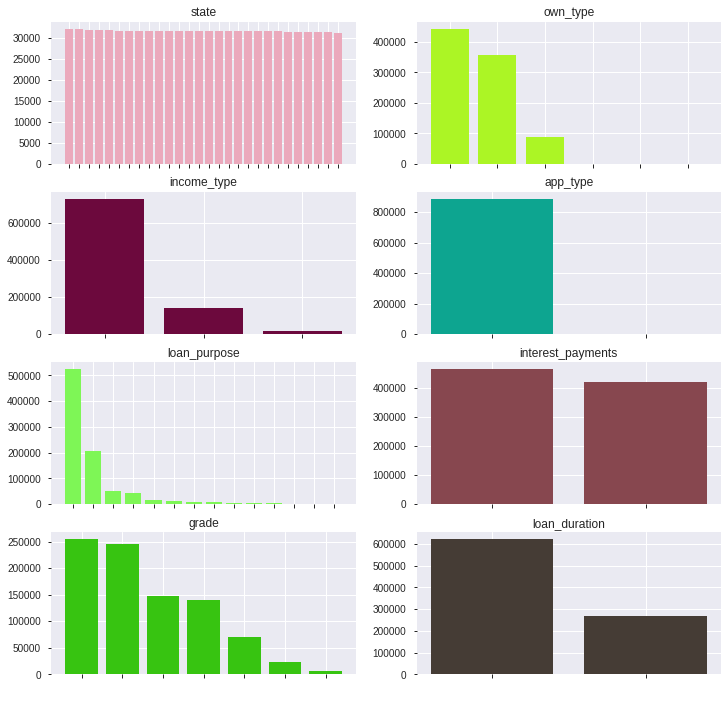

In [33]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(12, 12))

colors = []
for i in range(8):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, cat_list, colors):
  ax.bar(x = data[col].value_counts().index, height = data[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

Observation:

Normal Distributed Features: (Mean = Median = Mode)
state,
interest_payments,
app_type

Postively Skewed Features: (Mean > Median)
own_type,
income_type,
loan_purpose,
grade,
loan_duration
Negatively Skewed Features: (Mean < Median)

NA

In [0]:
from pandas_profiling import ProfileReport

In [19]:
profile=ProfileReport(df=data)

TypeError: ignored

Observation:

Profiling identified 10 numeric, 9 categorical, 1 boolean and 2 rejected features.

date_issued is found to be cardinal with 103 distinct values.

annual_pay, dti is found to be highy skewed.

total_pymnt is found to have 2% of zeros present while recoveries having 97.2% of zeros.

total_rec_prncp is highly correlated with total_pymnt while installment is 
highly correlated with loan_amount.

cust_id is highly correlated with year feature.

In [35]:
#Dataframe before performing changes
type_frame=pd.DataFrame(data=data.dtypes,columns=["Type"])
type_frame.T

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Type,int64,int64,object,object,int64,float64,object,object,object,object,object,object,int64,int64,float64,object,float64,float64,float64,float64,float64,int64


Observation:

Following features contain inconsitent data type. A symbol → represents will be changed to:
Feature [ Current Type → Desired Type ]
date_issued [ Object → Datetime ]
date_final [ Object → Datetime ]
is_default [ int → Boolean ]

In [0]:
data["date_issued"]=pd.to_datetime(data["date_issued"])
data["date_final"]=pd.to_datetime(data["date_final"],format="%m%d%Y")
data["is_default"]=data["is_default"].astype(bool)

In [59]:
data["date_final"].head()

0   2009-10-03
1   2010-10-07
2   2010-10-06
3   2008-10-04
4   2009-10-08
Name: date_final, dtype: datetime64[ns]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cust_id            887379 non-null  int64  
 1   year               887379 non-null  int64  
 2   state              887379 non-null  object 
 3   date_issued        887379 non-null  object 
 4   date_final         887379 non-null  int64  
 5   emp_duration       887379 non-null  float64
 6   own_type           887379 non-null  object 
 7   income_type        887379 non-null  object 
 8   app_type           887379 non-null  object 
 9   loan_purpose       887379 non-null  object 
 10  interest_payments  887379 non-null  object 
 11  grade              887379 non-null  object 
 12  annual_pay         887379 non-null  int64  
 13  loan_amount        887379 non-null  int64  
 14  interest_rate      887379 non-null  float64
 15  loan_duration      887379 non-null  object 
 16  dt

**Identification & Handling of Missing Data**

  **Null Data Identification & Handling**

In [39]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (887379, 22)


Features,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#before handling zero data
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Zeros Frequency'] = data[data == 0].count().values
null_frame['Missing %age'] = np.round(null_frame['Zeros Frequency']/data.shape[0], decimals = 5) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (887379, 22)


Features,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Zeros Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,451.000,17759.000,18145.000,862702.000,0.0,819950.000
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051,2.001,2.045,97.219,0.0,92.401


In [0]:
#Observation:

#Feature [ Missing Ratio ] → Action to be taken
#annual_pay [ ~0% ] → Drop data rows
#dti [ 0.05% ] → Replace with median dti
#total_pymnt [ 2% ] → No action
#total_rec_prncp [ 2% ] → No action
#recoveries [ 97% ] → No action
#is_default [ 92% ] → No action

**Performing Operations**

In [0]:
#dropping 2 cols of anual pay
data=data[data['annual_pay']!=0]
#filling dti values with ,mean
data["dti"]=data["dti"].replace(0,data["dti"].mean())

In [43]:
#after handling zero data
# Verifying changes over operation applied on data
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Zeros Frequency'] = data[data == 0].count().values
null_frame['Missing %age'] = np.round(null_frame['Zeros Frequency']/data.shape[0], decimals = 5) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (887377, 22)


Features,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
Zeros Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17759.000,18145.000,862700.000,0.0,819948.000
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.001,2.045,97.219,0.0,92.401


**identification n handling for duplicated **

Now we will identify the duplicacity in records and if present, we will drop it.

We are making a copy of data on which we will work on so that our original data is intact from harm and after identifying we can perfrom the same operation on our original data.
We'll drop cust_id to identify whether there are duplicate rows present in our data or not.

In [0]:
data2=data.copy()

In [0]:
data2.drop(["cust_id"],axis=1,inplace=True)

In [46]:
data2.duplicated().any()

False

In [47]:
data2.columns.duplicated().any()

False

**Below we have made a custom function to identify duplicate columns containing duplicate values.**

In [48]:
def duplicateCols(dataframe):
  '''Returns a list of labels of duplicate valued columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

# Making a call over copy of data
is_duplicate_cols = duplicateCols(data2)
print('Contains Duplicate Columns?', is_duplicate_cols)

Contains Duplicate Columns? None


**Post Profiling report**

In [0]:
#from pandas.profiling import ProfileReport
#profile=ProfileReport(data)
#profile.to_file(output=post_profile.html)

**Observation:

There are: Numeric = 9, Categorical = 8, Boolean = 1, Date = 2 features.
annual_pay, dti are highly skewed.

total_pymnt have 2% of zeros signifying 2% of people haven't paid any money.

total_rec_prncp is highly correlated with total_pymnt, installment is highly correlated with loan_amount & should be ignored for analysis.

recoveries has 97.2% zeros signifying around 97% of people have paid their debt.**

**Exploratory Data Analysis**

In [49]:
print("data shape:",data.shape)
data.head()

data shape: (887377, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


**Question 1: What is the proportion of customers who are defaulter and who are not?**

In [51]:
data["is_default"].value_counts()

0    819948
1     67429
Name: is_default, dtype: int64

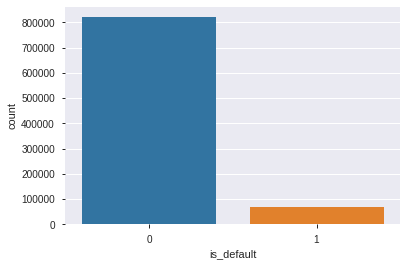

In [52]:
sns.countplot(data["is_default"])

Customers who are not default: 819948
Customers who are default: 67429


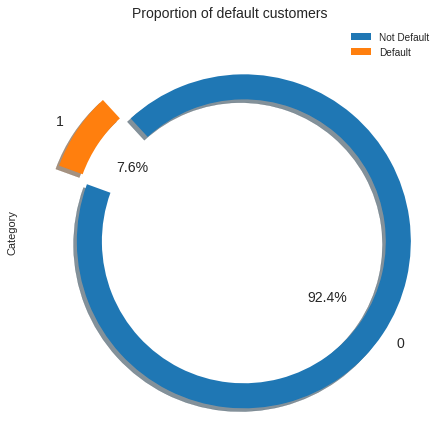

In [53]:
print('Customers who are not default:', data['is_default'].value_counts()[0])
print('Customers who are default:', data['is_default'].value_counts()[1])

space = np.ones(2)/10
data['is_default'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Not Default', 'Default'])
plt.ylabel('Category')
plt.title('Proportion of default customers', size = 14)
plt.show()

**Observation:

It comes out that only 7.6% of customers who took the loan have been identified defaulted out of 887377 customers.**

**Question 2: What is the rate of loan default with respect to final_date?**

In [60]:
year_frame = pd.DataFrame(data.groupby(by = ['date_final', 'is_default']).size(), columns = ['Count'])
year_frame.transpose()

date_final 2007-11-02       2008-01-10       2008-10-01       2008-10-02  \
is_default      False True       False True       False True       False   
Count               1     1         23    32          8     3          3   

date_final       2008-10-03       2008-10-04       2008-10-05        \
is_default True       False True       False True       False True    
Count          5          7    11         16     7         15    15   

date_final 2008-10-06       2008-10-07       2008-10-08       2008-10-09  \
is_default      False True       False True       False True       False   
Count               8    12         18    19         14    17         18   

date_final       2008-11-01       2008-11-02       2009-01-10        \
is_default True       False True       False True       False True    
Count         22         12    19          8    23         49    36   

date_final 2009-10-01       2009-10-02       2009-10-03       2009-10-04  \
is_default      False True       False True       False True       False   
Count              17    23         33    32         37    25         41   

date_final       2009-10-05       2009-10-06       2009-10-07        \
is_default True       False True       False True       False True    
Count         31         27    33         27    38         40    32   

date_final 2009-10-08       2009-10-09       2009-11-01       2009-11-02  \
is_default      False True       False True       False True       False   
Count              36    30         24    31         53    27         65   

date_final       2010-01-10       2010-10-01       2010-10-02        \
is_default True       False True       False True       False True    
Count         51        209    83         61    39        115    33   

date_final 2010-10-03       2010-10-04       2010-10-05       2010-10-06  \
is_default      False True       False True       False True       False   
Count             120    64         94    51        104    47        104   

date_final       2010-10-07       2010-10-08       2010-10-09        \
is_default True       False True       False True       False True    
Count         46        184    63        145    53        154    61   

date_final 2010-11-01       2010-11-02       2011-01-10       2011-10-01  \
is_default      False True       False True       False True       False   
Count             197    61        253    79        345   137        275   

date_final       2011-10-02       2011-10-03       2011-10-04        \
is_default True       False True       False True       False True    
Count         55        380    57        522    74        434    85   

date_final 2011-10-05       2011-10-06       2011-10-07       2011-10-08  \
is_default      False True       False True       False True       False   
Count             353    95        349    91        345   109        359   

date_final       2011-10-09       2011-11-01       2011-11-02        \
is_default True       False True       False True       False True    
Count        120        366   125        386   101        445   140   

date_final 2012-01-10       2012-10-01       2012-10-02       2012-10-03  \
is_default      False True       False True       False True       False   
Count             936   332        442   133        640   163        796   

date_final       2012-10-04       2012-10-05       2012-10-06        \
is_default True       False True       False True       False True    
Count        155        710   150        712   166        651   210   

date_final 2012-10-07       2012-10-08       2012-10-09       2012-11-01  \
is_default      False True       False True       False True       False   
Count             731   231        886   248        866   259        901   

date_final       2012-11-02       2013-01-10       2013-10-01        \
is_default True       False True       False True       False True    
Count        297        904   294       2027   805       1139   340   

date_final 20

In [56]:
data["date_final"].head()

0    1032009
1    1072010
2    1062010
3    1042008
4    1082009
Name: date_final, dtype: int64

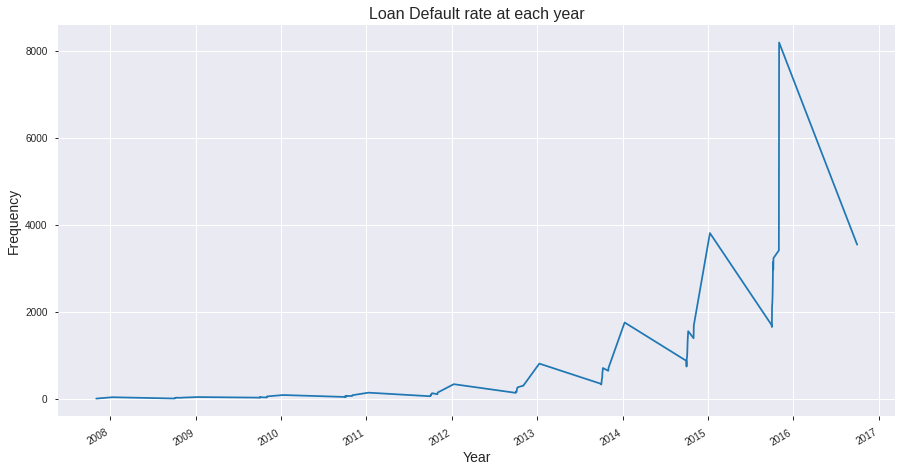

In [61]:
figure = plt.figure(figsize = [15, 8])

data[data['is_default'] == 1]['date_final'].value_counts().plot(kind = 'line')

plt.xlabel('Year', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Loan Default rate at each year', size = 16)
plt.show()

**Observation:

We can see that default rate around 2015-02 year was more steep than any other year.**

**Question 3: What is the frequency of ownership with respect to the being default of loan?**

In [0]:
own_type_frame=pd.DataFrame(data.groupby(["own_type","is_default"])["is_default"].count())

In [63]:
own_type_frame.T

own_type     ANY MORTGAGE         NONE       OTHER          OWN          RENT  \
is_default False    False  True  False True  False True   False True    False   
is_default     3   413856  29699    42     8   144    38  81177  6293  324726   

own_type           
is_default  True   
is_default  31391

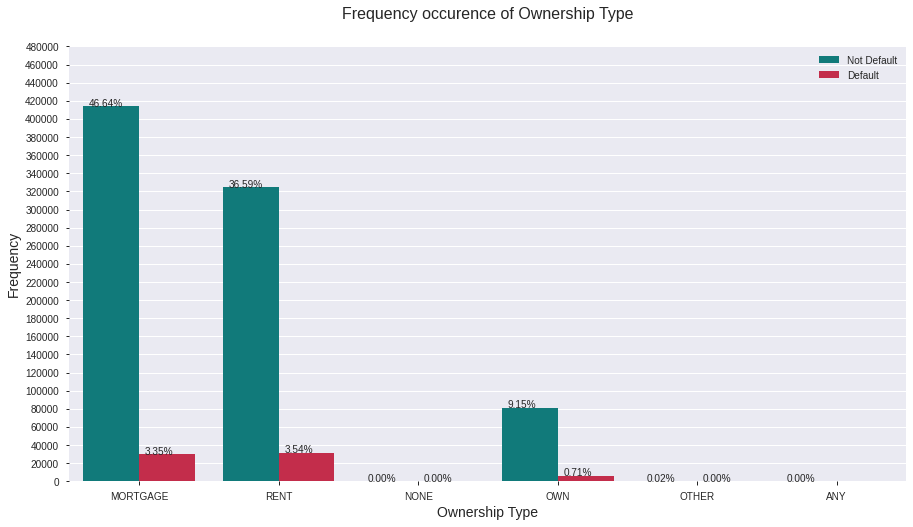

In [64]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'own_type',  data = data, hue = 'is_default', palette = ['darkcyan', 'crimson'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 500000, 20000))
plt.xlabel('Ownership Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Frequency occurence of Ownership Type', y=1.05, size = 16)
plt.show()

**Observation:**

**From the above analysis we can see that there are very few or no data points that are on default for NONE, OTHER, ANY. We could drop these points and visualize our results again.**

**Customers being default are only present for MORTGAGE, RENT and OWN type of Ownership.**

In [65]:
data["own_type"].value_counts()

MORTGAGE    443555
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: own_type, dtype: int64

In [66]:
print("before filteration:",data.shape)
data=data[(data["own_type"]=="MORTGAGE")|(data["own_type"]=="RENT")|(data["own_type"]=="OWN")]
print("after filteration:",data.shape)

before filteration: (887377, 22)
after filteration: (887142, 22)


MORTGAGE    443555
RENT        356117
OWN          87470
Name: own_type, dtype: int64


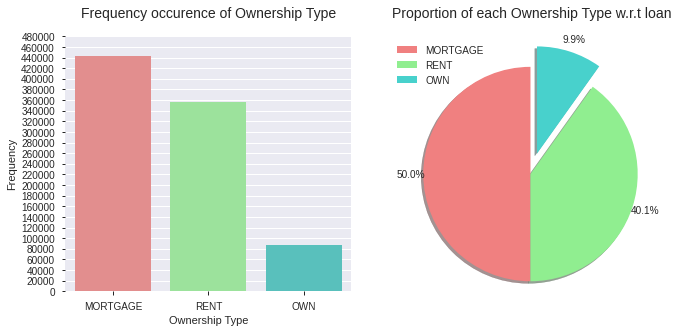

In [67]:
print(data['own_type'].value_counts())

# Bar Plot
colors_list = ['lightcoral', 'lightgreen', 'mediumturquoise']
figure = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.barplot(data['own_type'].value_counts().index, data['own_type'].value_counts(), palette  = colors_list)
plt.yticks(range(0, 500000, 20000))
plt.xlabel('Ownership Type')
plt.ylabel('Frequency')
plt.title('Frequency occurence of Ownership Type', y=1.05, size = 14)

explode_list = [0, 0 , 0.2]

plt.subplot(1, 2, 2)
# Pie Plot
data['own_type'].value_counts().plot(kind = 'pie', figsize = [10, 5], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list, 
                                     explode = explode_list)
plt.title('Proportion of each Ownership Type w.r.t loan', y = 1.05, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['own_type'].value_counts().index, loc = 'upper left', frameon = False)
plt.tight_layout(pad=2.0)
plt.show()

**Observation:**

**From above we can see that 50% of customers have ownership under MORTGAGE type.**

In [68]:
data["own_type"].value_counts().index

Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object')

In [69]:
data.head()

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,2007-01-12,2009-10-03,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,85781,2007,Rajasthan,2007-01-06,2010-10-07,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False
2,85675,2007,Manipur,2007-01-06,2010-10-06,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,False
3,84918,2007,Andhra Pradesh,2007-01-09,2008-10-04,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,False
4,84670,2007,Arunachal Pradesh,2007-01-06,2009-10-08,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,False


In [70]:
type_frame=pd.DataFrame(data.groupby(["state","is_default"])["is_default"].count())
type_frame.T

state      Andhra Pradesh       Arunachal Pradesh        Assam        Bihar  \
is_default          False True              False True   False True   False   
is_default          29214  2464             29312  2381  29291  2488  29203   

state            Chhattisgarh          Goa       Gujarat       Haryana        \
is_default True         False True   False True    False True    False True    
is_default  2364        29736  2468  29314  2465   29169  2357   29515  2474   

state      Himachal Pradesh       Jharkhand       Karnataka       Kerala  \
is_default            False True      False True      False True   False   
is_default            29263  2460     29174  2370     29265  2344  29260   

state            Madhya Pradesh       Maharashtra       Manipur        \
is_default True           False True        False True    False True    
is_default  2416          29312  2435       29373  2351   29196  2400   

state      Meghalaya       Mizoram       Nagaland       Odisha       Punjab  \
is_default     False True    False True     False True   False True   False   
is_default     28895  2380   29088  2439    29296  2399  29095  2486  29469   

state            Rajasthan       Sikkim       Tamil Nadu       Telangana  \
is_default True      False True   False True       False True      False   
is_default  2376     29210  2453  29680  2444      29121  2391     29122   

state            Tripura       Uttar Pradesh       Uttarakhand        \
is_default True    False True          False True        False True    
is_default  2451   29322  2337         29370  2370       29249  2278   

state      West Bengal        
is_default       False True   
is_default       29245  2342

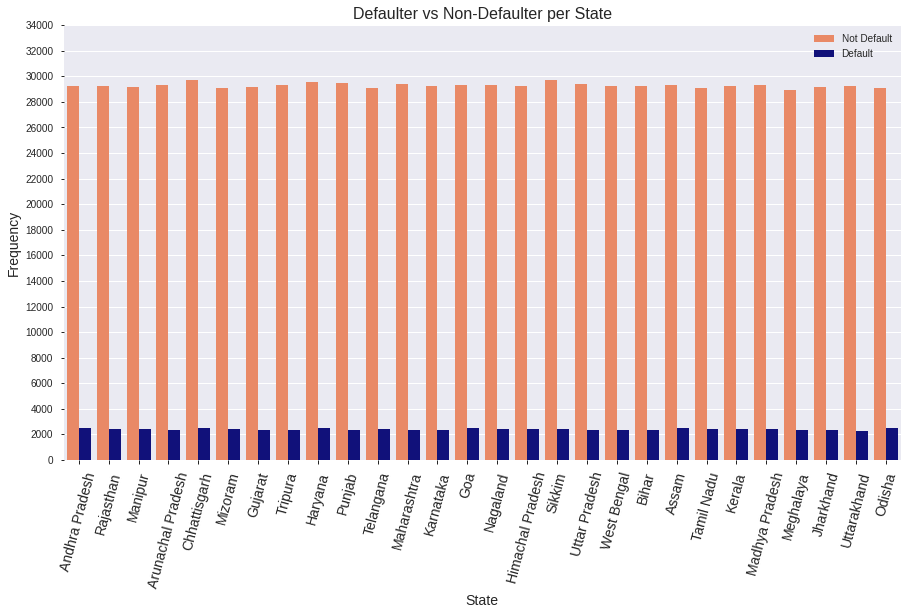

In [71]:
figure = plt.figure(figsize = [15, 8])

sns.countplot(x = 'state',  data = data, hue = 'is_default', palette = ['coral', 'darkblue'])

plt.yticks(range(0, 35000, 2000))
plt.xlabel('State', size = 14)
plt.xticks(rotation = 75, size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Defaulter vs Non-Defaulter per State', y = 1, size = 16)
plt.show()

**Observation:**

**From the above visualization, we found that each state has almost equally default rate frequency distribution (~2500/state)**

**Question 6: What is the distribution of loan default with respect to the loan duration?**

In [72]:
loan_duration_frame = pd.DataFrame(data.groupby(by = ['loan_duration', 'is_default']).size(), columns = ['Count'])
loan_duration_frame.transpose()

loan_duration  36 months         60 months       
is_default         False  True       False  True 
Count             578014  42889     241745  24494

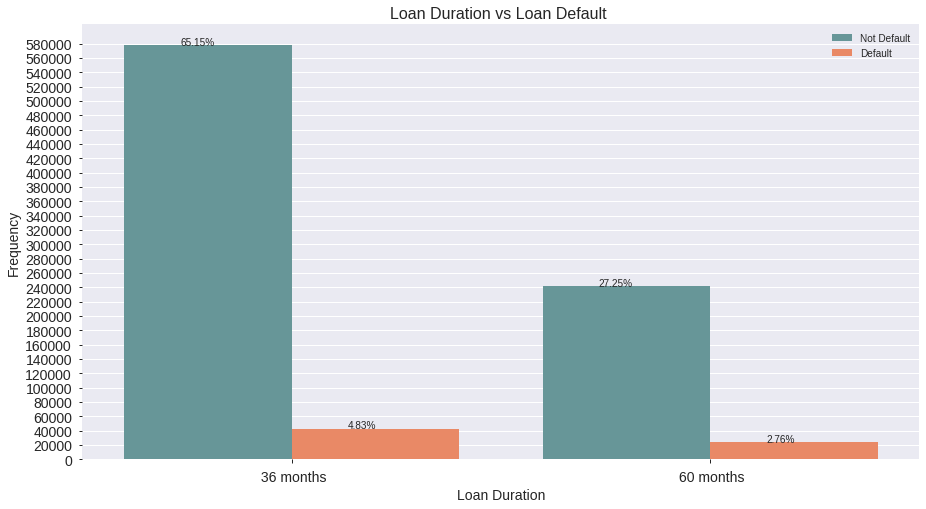

In [73]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'loan_duration',  data = data, hue = 'is_default', palette = ['cadetblue', 'coral'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))

plt.xlabel('Loan Duration', size = 14)
plt.ylabel('Frequency', size = 14)
plt.xticks(size = 14)
plt.yticks(range(0, 600000, 20000), size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Loan Duration vs Loan Default ', y = 1, size = 16)
plt.show()

**Observation:**

**Customers with 36 months loan duration are found to be more defaulter than the customers with 60 months of loan duration**

**Question 7: What is the frequency distribution of loan purpose with respect to loan default?**

In [74]:
data.head(2)

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,2007-01-12,2009-10-03,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,85781,2007,Rajasthan,2007-01-06,2010-10-07,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False


In [75]:
type_frame=pd.DataFrame(data.groupby(["loan_purpose","is_default"])["is_default"].count())
type_frame.T

loan_purpose   car       credit_card        debt_consolidation         \
is_default   False True        False  True               False  True    
is_default    8265   595      194367  11743             482547  41589   

loan_purpose educational       home_improvement       house        \
is_default         False True             False True  False True    
is_default           331    87            48263  3551  3288   416   

loan_purpose major_purchase       medical       moving        other        \
is_default            False True    False True   False True   False True    
is_default            15975  1294    7731   804   4805   606  38708  4158   

loan_purpose renewable_energy       small_business       vacation        \
is_default              False True           False True     False True    
is_default                502    72           8586  1777     4334   402   

loan_purpose wedding        
is_default     False True   
is_default      2057   289

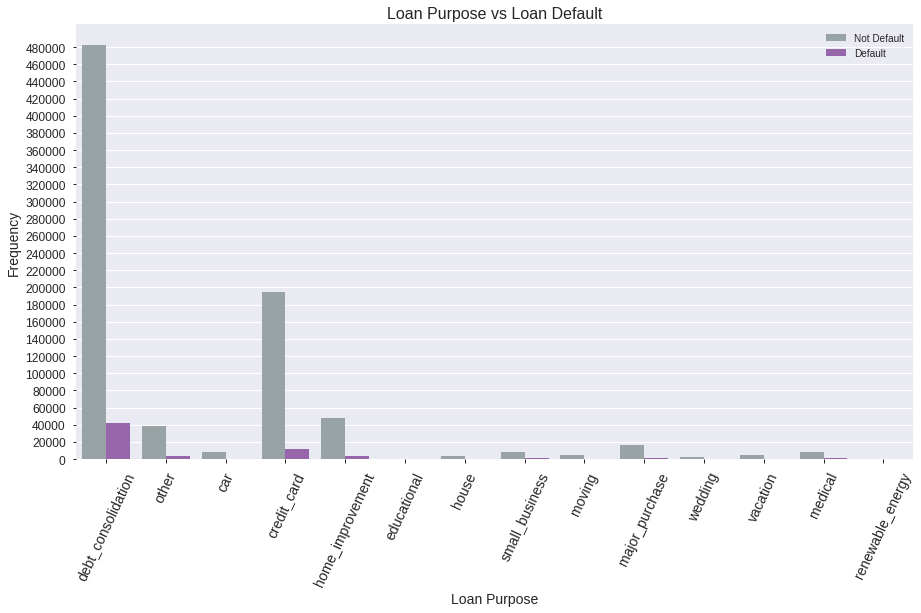

In [76]:
figure = plt.figure(figsize = [15, 8])
sns.countplot(x = 'loan_purpose',  data = data, hue = 'is_default', palette = ['#95a5a6', '#9b59b6'])
plt.xlabel('Loan Purpose', size = 14)
plt.ylabel('Frequency', size = 14)
plt.xticks(rotation = 65, size = 14)
plt.yticks(ticks = range(0, 500000, 20000), size = 12)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Loan Purpose vs Loan Default', y = 1, size = 16)
plt.show()

**Observation:**

**Customers with debt_consolidation are found to be more defaulter than any other reason of loan purpose.**

**Question 8: Which grade is mostly influenced by the is_default feature?**

In [77]:
type_frame=pd.DataFrame(data.groupby(["grade","is_default"])["is_default"].count())
type_frame.T

grade            A             B              C              D             E  \
is_default   False True    False  True    False  True    False  True   False   
is_default  144505  3661  241029  13440  226758  19046  123651  15850  60947   

grade                 F           G        
is_default True   False True  False True   
is_default  9740  18654  4380  4215  1266

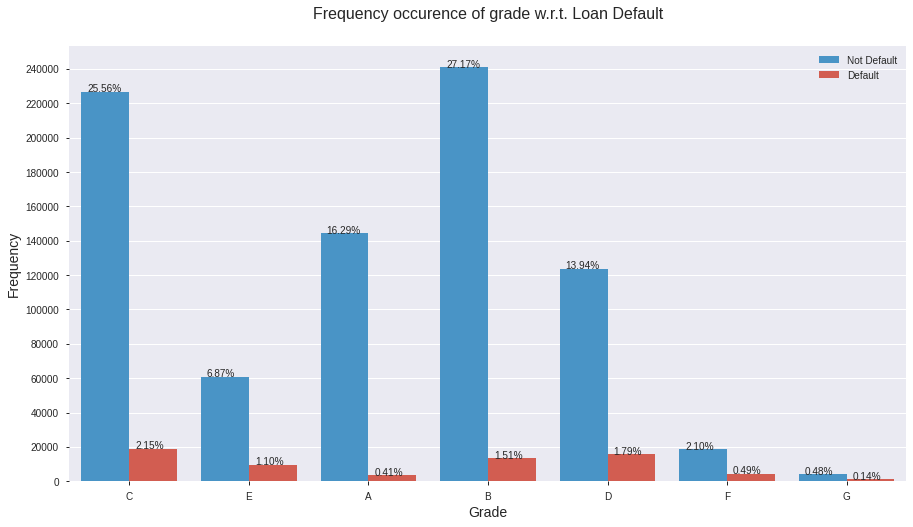

In [78]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'grade',  data = data, hue = 'is_default', palette = ['#3498db', '#e74c3c'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 8
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
  
plt.xlabel('Grade', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(ticks = range(0, 260000, 20000))
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Frequency occurence of grade w.r.t. Loan Default', y = 1.05, size = 16)
plt.show()

**Observation:**

**We can see that C grade is highly influenced followed by D then B and then all other in order.**

**Now we will make a function to analyze the default rate with respect to some numerical features. We will analyze the outliers and perform capping over these outliers.**

In [0]:
def QuantileDistPlot(x, y, sup_title):
  '''
  A function to plot distribution of quantiles of features
  x: categorical feature
  y: Numerical feature
  sup_title: sup_title
  '''
  figure = plt.figure(figsize = [15, 7])
  plt.subplot(1, 2, 1)
  sns.boxplot(y = data[x])
  plt.xlabel('Overall', size = 14)
  plt.ylabel('Interest Rate', size = 14)
  plt.title('Aggregate View', size = 16)
  plt.suptitle(t = "Quantile Distribution of " + sup_title + " feature", y = 1.03, size = 18)

  plt.subplot(1, 2, 2)
  ax = sns.boxplot(x = data[y], y = data[x])
  ax.set_xticklabels(labels = ['No', 'Yes'])
  plt.xlabel('Default', size = 14)
  plt.ylabel('Interest Rate', size = 14)
  plt.title('Segregate View', size = 16)
  plt.tight_layout(pad = 2.0)
  plt.show()

**Question 9: What is the distribution of annual income with being default or not?**

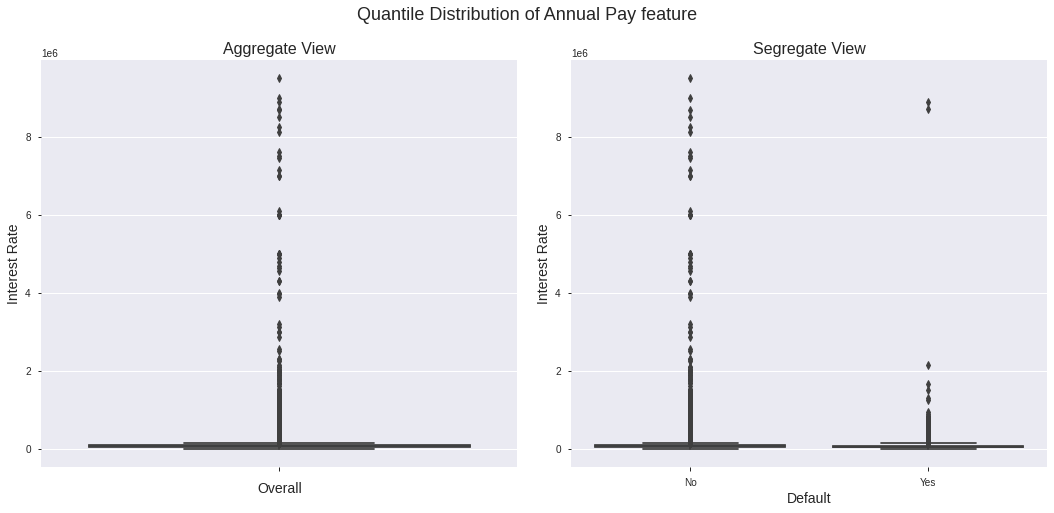

In [81]:
QuantileDistPlot(x = 'annual_pay', y = 'is_default', sup_title = 'Annual Pay')

Observation:

As a result we saw so many values which are outliers.
We will estimate the 99th percentile value and perform the capping over these outliers.
Before making changes we should analyze the amount that is present at 99th percentile

In [82]:
print('Amount [at 99 percentile]:', data['annual_pay'].quantile(0.99))

Amount [at 99 percentile]: 250000.0


Next we need to identify that part of the data, that contains defaulter as well as non-defaulter greater than 99th percentile.

In [83]:
anual_pay_default=data[(data["is_default"]==1)&(data["annual_pay"]>data["annual_pay"].quantile(0.99))]
anual_pay_non_default=data[(data["is_default"]==0)&(data["annual_pay"]>data["annual_pay"].quantile(0.99))]
print("anual_pay_default:",len(anual_pay_default))
print("anual_pay_non_default:",len(anual_pay_non_default))

anual_pay_default: 362
anual_pay_non_default: 7604


**We can also look at the average amount for the defaulter as well as non-defaulter.**

In [84]:
print('The average annual income of customers [default]:', np.round(anual_pay_default.mean(), decimals = 2))
print('The average annual income of customers [not default]:', np.round(anual_pay_non_default.mean(), decimals = 2))

The average annual income of customers [default]: cust_id            20647767.98
year                   2013.28
emp_duration              5.76
annual_pay           428784.56
loan_amount           26007.73
interest_rate            15.54
dti                       9.35
total_pymnt           10814.83
total_rec_prncp        6292.42
recoveries             1020.13
installment             813.20
is_default                1.00
dtype: float64
The average annual income of customers [not default]: cust_id            36805250.77
year                   2014.21
emp_duration              6.41
annual_pay           409951.45
loan_amount           25427.03
interest_rate            12.08
dti                      10.08
total_pymnt           12213.40
total_rec_prncp        9627.75
recoveries                0.00
installment             761.61
is_default                0.00
dtype: float64


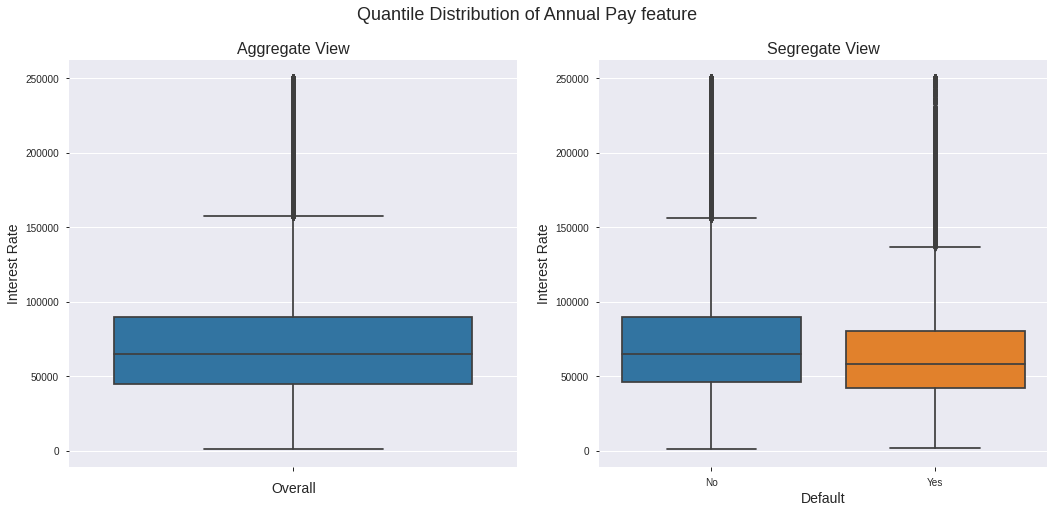

In [85]:
outlier_index = data[data['annual_pay'] > data['annual_pay'].quantile(0.99)].index
data.loc[outlier_index, 'annual_pay'] = data['annual_pay'].quantile(0.99)
QuantileDistPlot(x = 'annual_pay', y = 'is_default', sup_title = 'Annual Pay')

**Observation:

From above we can see that the values are distributed outside the extremes.
We will handle this spread by applying standardization on data when we will prepare data before feeding to the model.**

**Question 10: What is the distribution of interest rate with being default or not?**

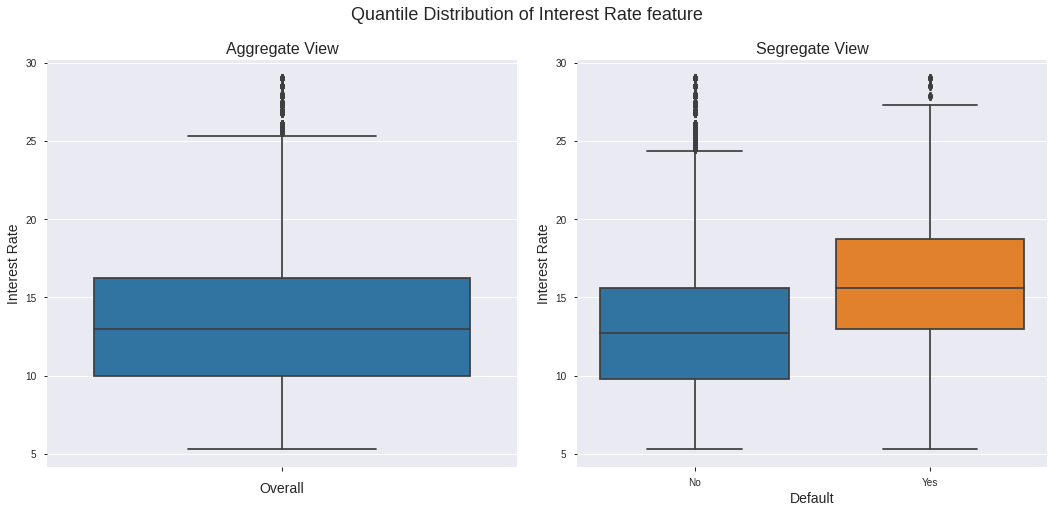

In [86]:
QuantileDistPlot(x = 'interest_rate', y = 'is_default', sup_title = 'Interest Rate')

Observation:

We can see some outlier. We can perform capping here.
We shall see the values greater than 99th precentile.
Lets' get the value of interest rate at 99th percentile and replace the outlied values with 99th percentile value.
Before making changes we should analyze the interest rate that is present at 99th percentile.

In [87]:
print('Interest Rate [at 99 percentile]:', data['interest_rate'].quantile(0.99))

Interest Rate [at 99 percentile]: 24.99


In [88]:
interest_rate_default = data[(data['is_default'] == 1) & (data['interest_rate'] > data['interest_rate'].quantile(0.99))]['interest_rate']
interest_rate_notdefault = data[(data['is_default'] == 0) & (data['interest_rate'] > data['interest_rate'].quantile(0.99))]['interest_rate']

print('Customers Frequency [default]:', len(interest_rate_default))
print('Customers Frequency [not default]:', len(interest_rate_notdefault))

Customers Frequency [default]: 1303
Customers Frequency [not default]: 5190


In [89]:
print('The average interest rate [default]:', np.round(interest_rate_default.mean(), decimals = 2))
print('The average interest rate [not default]:', np.round(interest_rate_notdefault.mean(), decimals = 2))

The average interest rate [default]: 25.93
The average interest rate [not default]: 26.17


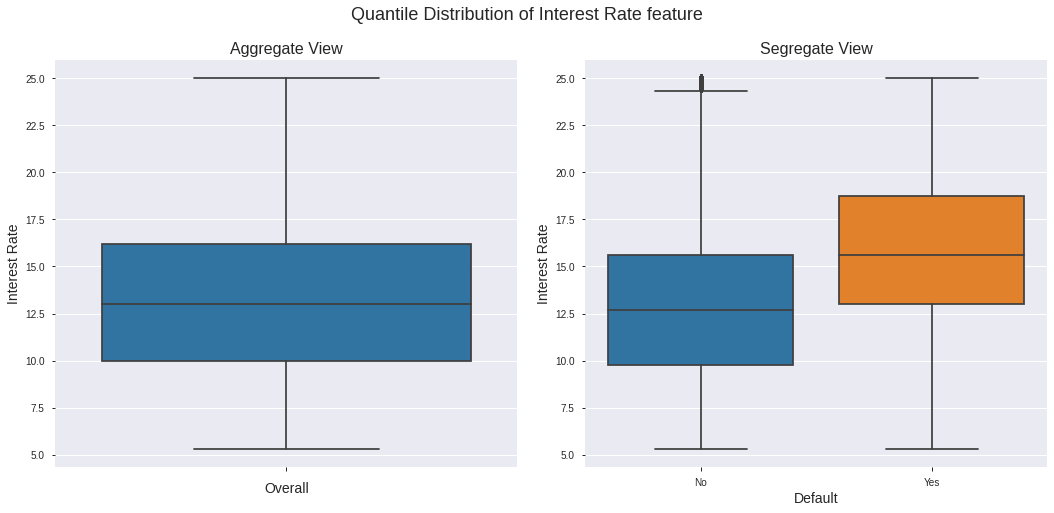

In [90]:
# Performing capping and analyzing again
outlier_index = data[data['interest_rate'] > data['interest_rate'].quantile(0.99)].index
data.loc[outlier_index, 'interest_rate'] = data['interest_rate'].quantile(0.99)
QuantileDistPlot(x = 'interest_rate', y = 'is_default', sup_title = 'Interest Rate')

**Question 11: What is the distribution of Dept to Income Ratio (dti) with being default or not?**

In [91]:
data.head(2)

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,2007-01-12,2009-10-03,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000.0,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,85781,2007,Rajasthan,2007-01-06,2010-10-07,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000.0,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False


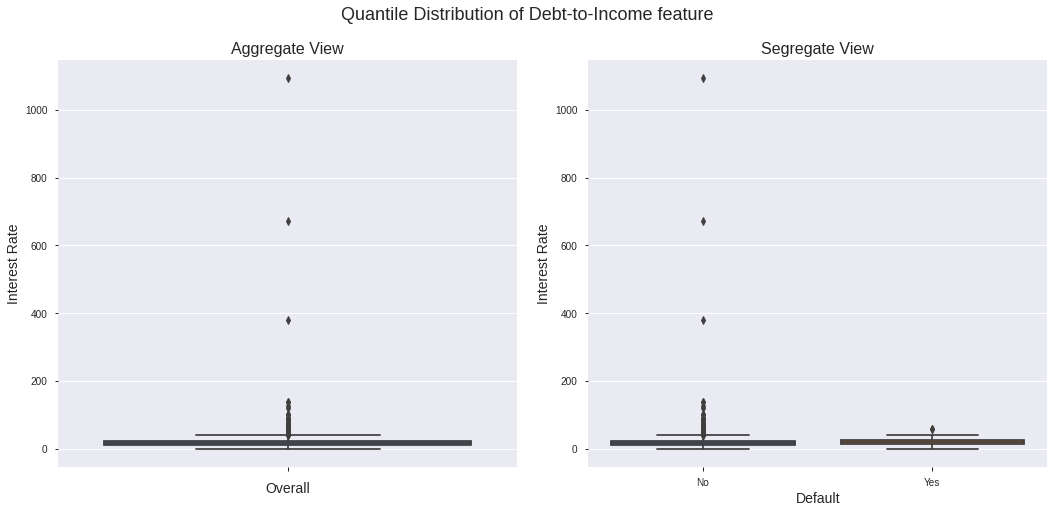

In [92]:
QuantileDistPlot(x = 'dti', y = 'is_default', sup_title = 'Debt-to-Income')

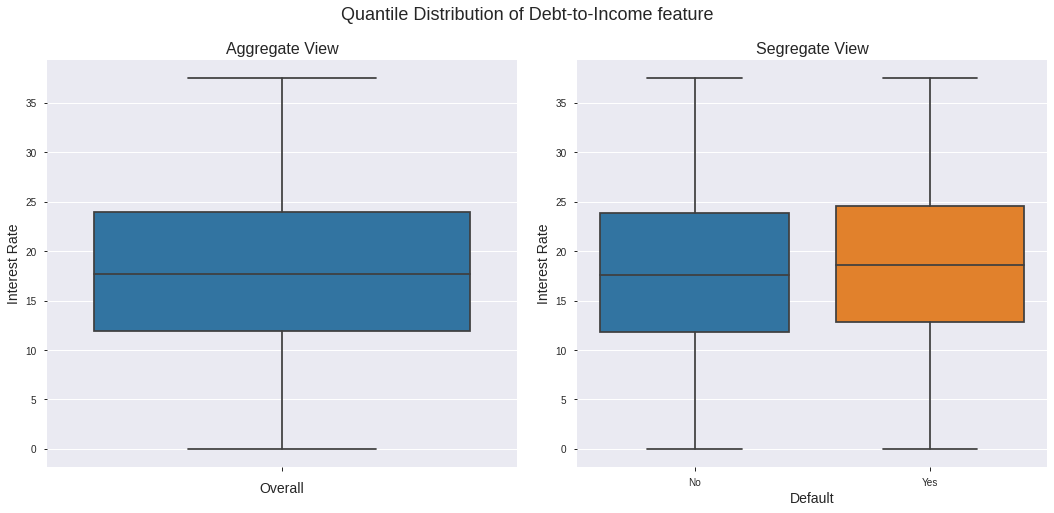

In [93]:
# Performing capping and analyzing again
outlier_index = data[data['dti'] > data['dti'].quantile(0.99)].index
data.loc[outlier_index, 'dti'] = data['dti'].quantile(0.99)
QuantileDistPlot(x = 'dti', y = 'is_default', sup_title = 'Debt-to-Income')

**Preprocessing**

In [94]:
data.drop(labels = ['cust_id', 'date_issued', 'date_final'], axis = 1, inplace = True)
print(data.shape)
data.head()

(887142, 19)


,year,state,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,2007,Andhra Pradesh,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000.0,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,True
1,2007,Rajasthan,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000.0,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,False
2,2007,Manipur,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000.0,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,False
3,2007,Andhra Pradesh,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000.0,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,False
4,2007,Arunachal Pradesh,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,250000.0,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,False


**Handling Categorical Features:
We can perform label encoding on year, income_type, app_type, interest_payments, grade, loan_duration as they are ordered features & one hot encoding on own_type, loan_purpose as they are unordered in nature. But state is unordered, if performed label encoding, machine will make a difference and if we performed dummification, there will be too many features. Instead we can drop it.**

In [95]:
data.drop(labels = ['state'], axis = 1, inplace = True)
print(data.shape)
print('Drop Success!')

(887142, 18)
Drop Success!


**Performing Label Encoding**

In [96]:
ordered_labels = ['year', 'income_type', 'app_type', 'interest_payments', 'grade', 'loan_duration']
for i in ordered_labels:
  if data[i].dtype=="object":
    data[i]=LabelEncoder().fit_transform(data[i])
print("sucess")
print(data.shape)

sucess
(887142, 18)


In [97]:
data = pd.get_dummies(data = data, columns = ['own_type', 'loan_purpose'])
print('Data Shape:', data.shape)
data.head()

Data Shape: (887142, 33)


,year,emp_duration,income_type,app_type,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default,own_type_MORTGAGE,own_type_OWN,own_type_RENT,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding
0,2007,10.0,1,0,1,2,73000.0,25000,10.91,0,22.13,13650.38,8767.32,2207.65,817.41,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2007,0.5,1,0,1,2,40000.0,1400,10.91,0,8.61,1663.04,1400.00,0.00,45.78,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2007,10.0,1,0,0,4,25000.0,1000,14.07,0,16.27,1231.38,1000.00,0.00,34.21,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2007,10.0,1,0,1,0,65000.0,5000,7.43,0,0.28,5200.44,5000.00,0.00,155.38,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2007,10.0,0,0,1,0,250000.0,5000,7.75,0,5.38,5565.65,5000.00,0.00,156.11,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
x,y=data.iloc[:,data.columns!="is_default"],data["is_default"]

In [99]:
print(x.shape)
print(y.shape)

(887142, 32)
(887142,)


In [100]:
x_data=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
print(x_data.shape)
x_data.head()

(887142, 32)


,year,emp_duration,income_type,app_type,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,own_type_MORTGAGE,own_type_OWN,own_type_RENT,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding
0,-5.574432,1.125972,-0.351903,-0.02396,0.952365,0.153641,-0.014241,1.214361,-0.534239,-0.654823,0.484248,0.774092,0.454409,5.277843,1.558951,1.000036,-0.33073,-0.818915,-0.100438,-0.550131,0.832214,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,-0.225328,-0.025445,-0.108717,-0.073261,-0.051492
1,-5.574432,-1.582662,-0.351903,-0.02396,0.952365,0.153641,-0.816022,-1.583304,-0.534239,-0.654823,-1.151999,-0.748932,-0.657606,-0.112030,-1.601041,-0.999964,-0.33073,1.221128,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492
2,-5.574432,1.125972,-0.351903,-0.02396,-1.050017,1.677418,-1.180468,-1.630722,0.190819,-0.654823,-0.224954,-0.803776,-0.717981,-0.112030,-1.648422,-0.999964,-0.33073,1.221128,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492
3,-5.574432,1.125972,-0.351903,-0.02396,0.952365,-1.370135,-0.208612,-1.156542,-1.332720,-0.654823,-2.160131,-0.299496,-0.114226,-0.112030,-1.152205,1.000036,-0.33073,-0.818915,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492
4,-5.574432,1.125972,-2.865940,-0.02396,0.952365,-1.370135,4.286219,-1.156542,-1.259296,-0.654823,-1.542908,-0.253095,-0.114226,-0.112030,-1.149215,1.000036,-0.33073,-0.818915,-0.100438,-0.550131,-1.201614,-0.021712,-0.249055,-0.064751,-0.140898,-0.098561,-0.078338,4.437984,-0.025445,-0.108717,-0.073261,-0.051492


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state = 42, stratify = y)
print('Train Shape:', x_train.shape, y_train.shape)
print('Test Shape:', x_test.shape, y_test.shape)

Train Shape: (709713, 32) (709713,)
Test Shape: (177429, 32) (177429,)


**Feature Selection using Random Forest
Random forests are one the most popular machine learning algorithms because they provide:
a good predictive performance,
low overfitting and
easy interpretability.
This interpretability derives the importance of each feature on the tree decision.
In other words, it is easy to compute how much each feature is contributing to the decision**

In [103]:
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced"))
sel.fit(x_train,y_train)
selected_feat=x_train.columns[(sel.get_support())].to_list()
print(len(selected_feat))
selected_feat

10


['year',
 'emp_duration',
 'annual_pay',
 'loan_amount',
 'interest_rate',
 'dti',
 'total_pymnt',
 'total_rec_prncp',
 'recoveries',
 'installment']

**Model Development & Evaluation**

In this section we'll build model using only important features that impact highly on our target feature i.e. is_default.
In the following part we made a function to measure the performance of the model

In [0]:
def PRCurve(model):
  '''
  A function to visualize Precision Recall Curve.
  Returns average precision score of the model.
  Data to fit must be training i.e. X_train, y_train.
  Data score will be estimated on X_test, y_test.
  '''
  from yellowbrick.classifier import precision_recall_curve
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

In [105]:
imp_feature = x_data[selected_feat]

X_train, X_test, y_train, y_test = train_test_split(imp_feature, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (709713, 10) (709713,)
Testing Data Shape: (177429, 10) (177429,)


In [119]:
log  = LogisticRegression(random_state = 42)
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(x_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(x_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model=log)
plt.show()

Accuracy Score (Train Data): 0.951
Accuracy Score (Test Data): 0.951
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       0.98      0.36      0.53     13477

    accuracy                           0.95    177429
   macro avg       0.97      0.68      0.75    177429
weighted avg       0.95      0.95      0.94    177429



NameError: ignored

<Figure size 720x576 with 0 Axes>

**Random Forest Classifier**

In [121]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(x_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(x_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

Accuracy Score (Train Data): 0.952
Accuracy Score (Test Data): 0.952
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       1.00      0.36      0.53     13477

    accuracy                           0.95    177429
   macro avg       0.98      0.68      0.75    177429
weighted avg       0.95      0.95      0.94    177429



NameError: ignored

<Figure size 720x576 with 0 Axes>

In [123]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(x_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(x_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

Accuracy Score (Train Data): 0.966
Accuracy Score (Test Data): 0.966
              precision    recall  f1-score   support

       False       0.96      1.00      0.98    163952
        True       1.00      0.55      0.71     13477

    accuracy                           0.97    177429
   macro avg       0.98      0.78      0.85    177429
weighted avg       0.97      0.97      0.96    177429



**IMBALANCED MODELS-NEED TO ADDRESS THROUGH SMOTE**

SMOTE Technique & its Implementation
SMOTE refers to Synthetic Minority Oversampling Technique.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
It synthesises new minority instances between existing minority instances.
It generates the virtual training records by linear interpolation for the minority class.
These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.
After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

**Before implementing SMOTE**

In [125]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (709713, 10) (709713,)
Testing Data Shape: (177429, 10) (177429,)


**PERFORMING smote OPERATION**

In [0]:
sm=SMOTE(random_state=42,ratio=1)


In [0]:
sm.fit_sample(x_data,y)
x_new=pd.DataFrame(data=x,columns=x_data.columns)
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=42,stratify=y)

**after implementing SMOTE**

In [129]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (709713, 32) (709713,)
Testing Data Shape: (177429, 32) (177429,)


In [130]:
log  = LogisticRegression(random_state = 42)
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(x_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(x_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

Accuracy Score (Train Data): 0.952
Accuracy Score (Test Data): 0.952
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       0.99      0.36      0.53     13477

    accuracy                           0.95    177429
   macro avg       0.97      0.68      0.75    177429
weighted avg       0.95      0.95      0.94    177429



In [131]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(x_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(x_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

Accuracy Score (Train Data): 0.952
Accuracy Score (Test Data): 0.952
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    163952
        True       1.00      0.36      0.53     13477

    accuracy                           0.95    177429
   macro avg       0.98      0.68      0.75    177429
weighted avg       0.95      0.95      0.94    177429



In [132]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(x_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(x_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

Accuracy Score (Train Data): 0.966
Accuracy Score (Test Data): 0.966
              precision    recall  f1-score   support

       False       0.96      1.00      0.98    163952
        True       1.00      0.55      0.71     13477

    accuracy                           0.97    177429
   macro avg       0.98      0.78      0.85    177429
weighted avg       0.97      0.97      0.96    177429



In [133]:
fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(1, 1, 1)

colours = ['#CAF270', '#95E681', '#65D794', '#3CC5A3', '#26B1AC', '#359CAC', '#4D86A4', '#607093', '#695B7C']

ax = plot_importance(clf, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.xlabel(xlabel = 'F-Score', size = 14)
plt.ylabel(ylabel = 'Features', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Ordering feature importance learned by model', size = 16)
plt.show(

SyntaxError: ignored